# MTE 546 - Assignment 1
Author: **Austin Milne**
Due Date: Jan 22nd, 2023 - 11:59pm

## Problem Statement
A company developed a cheap sensor attached to a simple mechanical 
arm that can estimate the roughness of the surface (denoted by x) of different objects. This system is used in a packaging line where to detect different fruits and classify them for packaging. The measurement of roughness of 20 different apples and 20 different lemons using this system showed the measures below:

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

apples = [2.56, 3.01, 3.22, 3.44, 3.62, 3.03, 2.40, 2.70, 2.58, 3.94, 2.76, 3.30, 2.92, 3.36, 2.69, 2.44, 2.43, 3.20, 2.93, 2.92]
lemon = [4.57, 4.12, 4.08, 4.64, 3.68, 4.28, 4.33, 3.90, 4.09, 3.53, 3.54, 4.04, 4.29, 5.03, 3.73, 4.07, 3.97, 3.23, 3.82, 3.28]

Build likelihood functions for roughness (x) separately for apples and lemons using above measurements. Consider that each likelihood functions can be represented by a Normal distribution in both apples and lemons cases;

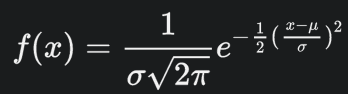

Find the distribution for both likelihood functions, i.e., p(x|Apple) and p(x|Lemon), in MATLAB or any other software.

## Creating the Normal Distributions

In [3]:
# 1. Compute the mean and standard deviation of the two samples.
apples_mean = np.mean(apples)
apples_std = np.std(apples)

lemon_mean = np.mean(lemon)
lemon_std = np.std(lemon)

print(f"Apples mean: {apples_mean:.2f}, std: {apples_std:.2f}")
print(f"Lemon mean: {lemon_mean:.2f}, std: {lemon_std:.2f}")

Apples mean: 2.97, std: 0.41
Lemon mean: 4.01, std: 0.44


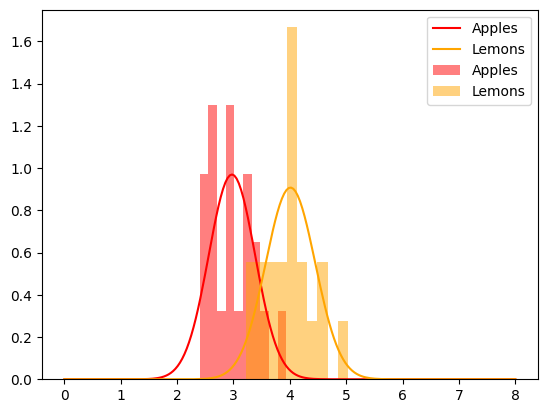

In [4]:
#2. Graph the data sets and normal distributions together.
x = np.linspace(0, 8, 200)
apples_norm = stats.norm.pdf(x, apples_mean, apples_std)
lemons_norm = stats.norm.pdf(x, lemon_mean, lemon_std)
plt.plot(x, apples_norm, label="Apples", color="red")
plt.plot(x, lemons_norm, label="Lemons", color="orange")

plt.hist(apples, density=True, alpha=0.5, label="Apples", color="red")
plt.hist(lemon, density=True, alpha=0.5, label="Lemons", color="orange")

plt.legend()
plt.show()


## Determining Likelihood of Measurement Classification
A fruit roughness was measured by the sensor which showed x = 3.4;  
a.  What is the likelihood of x=3.4 given it is an apple? 
b.  What is the likelihood of x=3.4 given it is a lemon? 
c.  What would be the decision of a max Likelihood classifier about this fruit? 

Measured roughness value: 3.4

Fruit      Probability
-------  -------------
Apple         0.565161
Lemon         0.345316


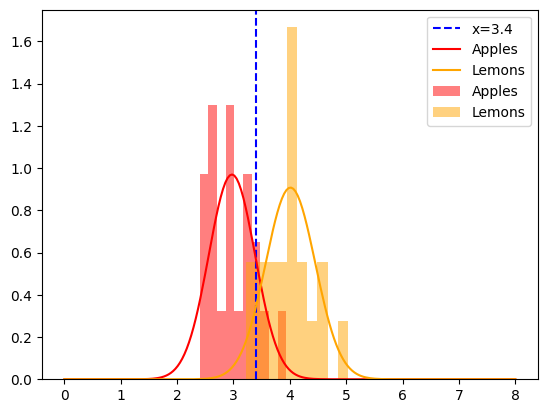

Based on the probability, the fruit is an apple


In [5]:
from tabulate import tabulate
measured = 3.4
print(f"Measured roughness value: {measured}\n")

# 3. Compute the probability of a roughness of 3.4 being an apple or lemon.
apples_prob = stats.norm.pdf(measured, apples_mean, apples_std)
lemons_prob = stats.norm.pdf(measured, lemon_mean, lemon_std)

# Create a list of lists for the table
table_data = [["Fruit", "Probability"],
              ["Apple", apples_prob],
              ["Lemon", lemons_prob]]

# Print the table
print(tabulate(table_data, headers="firstrow"))

# Draw a line at the measured value
plt.axvline(x=measured, color="blue", label="x=3.4", linestyle="--")

# Show the updated plot
plt.plot(x, apples_norm, label="Apples", color="red")
plt.plot(x, lemons_norm, label="Lemons", color="orange")
plt.hist(apples, density=True, alpha=0.5, label="Apples", color="red")
plt.hist(lemon, density=True, alpha=0.5, label="Lemons", color="orange")
plt.legend()
plt.show()

print(f"Based on the probability, the fruit is a{'n apple' if apples_prob > lemons_prob else ' lemon'}")

## Using Bayes Rule for Classification
Now use the Bayes Rule, shown below, to estimate the conditional probability of the 
fruit to be an apple or lemon given the measurements and prior knowledge? Compute 
P(Apple|x=3.4) and P(Lemon | x=3.4).

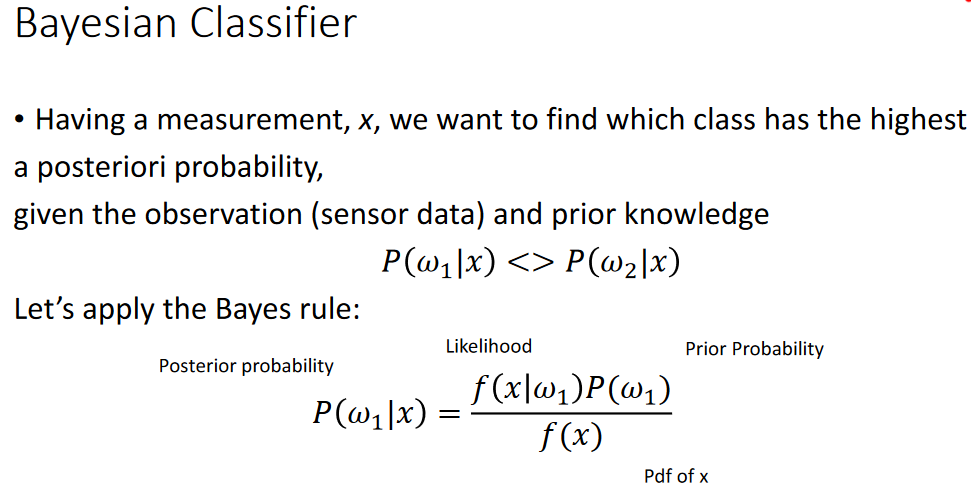

Given 1000 apples and 2000 lemons:



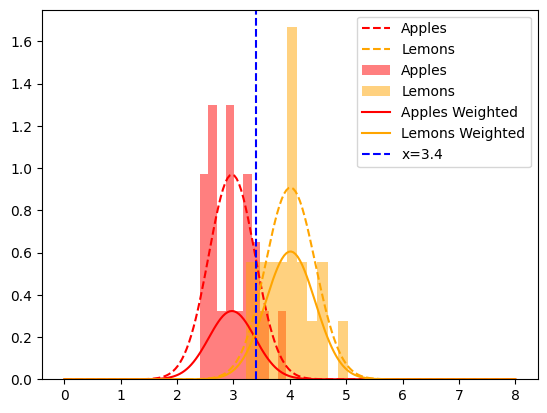

Fruit       Prior    Likelihood    Relative Posterior
-------  --------  ------------  --------------------
Apple    0.333333      0.565161              0.188387
Lemon    0.666667      0.345316              0.230211

Based on the relative posterior, the fruit is a lemon


In [6]:
from tabulate import tabulate
#4. Compute the conditional probability of a roughness of 3.4 being an apple or lemon using bayes rule.
apple_count = 1000
lemon_count = 2000

prior_apple = apple_count / (apple_count + lemon_count)
prior_lemon = lemon_count / (apple_count + lemon_count)

def gaussian_1d(x, mean, std):
    return 1/(np.sqrt(2*np.pi*std**2)) * np.exp(-(x-mean)**2/(2*std**2))

likelihood_apple = gaussian_1d(measured, apples_mean, apples_std)
likelihood_lemon = gaussian_1d(measured, lemon_mean, lemon_std)

relative_posterior_apple = likelihood_apple * prior_apple
relative_posterior_lemon = likelihood_lemon * prior_lemon

print(f"Given {apple_count} apples and {lemon_count} lemons:\n")

# Create a graph showing the weighted likelihoods using gaussian and prior probabilities
x = np.linspace(0, 8, 200)

apples_norm = stats.norm.pdf(x, apples_mean, apples_std)
lemons_norm = stats.norm.pdf(x, lemon_mean, lemon_std)
plt.plot(x, apples_norm, label="Apples", color="red", linestyle="--")
plt.plot(x, lemons_norm, label="Lemons", color="orange", linestyle="--")
plt.hist(apples, density=True, alpha=0.5, label="Apples", color="red")
plt.hist(lemon, density=True, alpha=0.5, label="Lemons", color="orange")

plt.plot(x, gaussian_1d(x, apples_mean, apples_std) * prior_apple, label="Apples Weighted", color="red")
plt.plot(x, gaussian_1d(x, lemon_mean, lemon_std) * prior_lemon, label="Lemons Weighted", color="orange")

plt.axvline(x=measured, color="blue", label="x=3.4", linestyle="--")
plt.legend()
plt.show()

# Show a table with the relevant probabilities
table_data = [["Fruit", "Prior", "Likelihood", "Relative Posterior"],
              ["Apple", prior_apple, likelihood_apple, relative_posterior_apple],
              ["Lemon", prior_lemon, likelihood_lemon, relative_posterior_lemon]]
print(tabulate(table_data, headers="firstrow"))

print(f"\nBased on the relative posterior, the fruit is a{'n apple' if relative_posterior_apple > relative_posterior_lemon else ' lemon'}")



## Using an Additional Sensor
As the performance in discriminating fruits was terrible, they decided to add another 
sensor that can detect the color. With that sensor they noticed that:

P(Lemon|yellow) = 0.75, P(Apple|yellow) = 0.25,  
P(Lemon | red) = 0.08, P(Apple|red) = 0.92  

Now they measured a new fruit from the same pool, its roughness x =3.4, and its color 
is detected yellow. a. What is the probability of this fruit being an apple?  

What is the probability of this fruit being an apple?  
What is the probability of this fruit being a lemon?

$$
\begin{array}{cl}
    \text{Var} & \text{Meaning} \\ \hline
    x \equiv & \text{roughness of the fruit} \\
    y \equiv & \text{color of the fruit} \\
    A \equiv & \text{Apple} \\
    L \equiv & \text{Lemon} \\
\end{array}
$$

$$
\text{Probability of Apple if Roughness is 3.4 \& Colour is yellow} = P(A|x, y) \\~\\
\text{Apply Bayes Rule} \\~\\
P(A|x, y) = \frac{P(x, y|A)P(A)}{P(x, y)} \\~\\
\text{Invert A} \\~\\
P(A|x, y) = \frac{P(x|A)P(A|y)P(y)}{P(x, y)} \\~\\
P(A|x, y) = \frac{P(x|A)P(A|y)P(y)}{P(x, y, A) + P(x, y, L)} \\~\\
P(A|x, y) = \frac{P(x|A)P(A|y)P(y)}{P(x, y|A)P(A) + P(x, y|L)P(L)} \\~\\
P(A|x, y) = \frac{P(x|A)P(A|y)P(y)}{P(x|A)P(y|A)P(A) + P(x|L)P(y|L)P(L)} \\~\\
\text{Invert A \& L} \\~\\
P(A|x, y) = \frac{P(x|A)P(A|y)P(y)}{P(x|A)P(A|y)P(y) + P(x|L)P(L|y)P(y)} \\~\\
P(A|x, y) = \frac{P(x|A)P(A|y)\cancel{P(y)}}{P(x|A)P(A|y)\cancel{P(y)} + P(x|L)P(L|y)\cancel{P(y)}} \\~\\
P(A|x, y) = \frac{P(x|A)P(A|y)}{P(x|A)P(A|y) + P(x|L)P(L|y)} \\~\\
\therefore P(L|x, y) = \frac{P(x|L)P(L|y)}{P(x|A)P(A|y) + P(x|L)P(L|y)} \\~\\
$$

Therefore, the probability of the fruit being an apple is:

In [12]:
# 5. Compute the probability of the item being a lemon vs apple if the roughness is 3.4 and the colour is detected as yellow.
# Probability of x given Apple/lemon
p_x_A = stats.norm.pdf(measured, apples_mean, apples_std)
P_x_L = stats.norm.pdf(measured, lemon_mean, lemon_std)

# Probability of Apple/Lemon given color
p_A_yy = 0.25 # Probability of apple given yellow
p_L_yy = 0.75 # Probability of lemon given yellow
p_A_yr = 0.92 # Probability of apple given red
p_L_yr = 0.08 # Probability of lemon given red

# Apply Bayes rule for the dual sensor
relative_posterior_apple_dual = (p_x_A * p_A_yy) / ((p_x_A * p_A_yy) + (P_x_L * p_L_yy))
relative_posterior_lemon_dual = (P_x_L * p_L_yy) / ((p_x_A * p_A_yy) + (P_x_L * p_L_yy))

# Show a table with the relevant probabilities
table_data = [["Fruit", "Relative Posterior"],
              ["Apple", relative_posterior_apple_dual],
              ["Lemon", relative_posterior_lemon_dual]]
print(tabulate(table_data, headers="firstrow"))

print(f"\nBased on the relative posterior of dual sensors, the fruit is a{'n apple' if relative_posterior_apple_dual > relative_posterior_lemon_dual else ' lemon'}")

Fruit      Relative Posterior
-------  --------------------
Apple                0.352981
Lemon                0.647019

Based on the relative posterior of dual sensors, the fruit is a lemon
